In [37]:
import pandas as pd
import sqlite3

## • analyze only the users and not the admins
## • the fontsize and the figsize remain the same
## • for each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue, 17-18: 6 commits, Wed, 17-18: 7 commits
## • choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [38]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query1 = """
        SELECT timestamp FROM checker
        WHERE uid LIKE 'user_%'
        """
df = pd.io.sql.read_sql(query1, con, parse_dates='timestamp')
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.dayofweek
df['day'] = df['weekday'].apply(lambda x: 'weekend' if x > 4 else 'working_day')
df.rename(columns={'timestamp':'mean'}, inplace=True)
df.pop('weekday')
to_mean = df.groupby(["date", 'hour', 'day']).count()
res = to_mean.groupby(['day', 'hour']).mean().reset_index()
res.loc[len(res.index)] = ['weekend', 2, 0]
res.loc[len(res.index)] = ['weekend', 4, 0]
res

,day,hour,mean
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [39]:
data = pd.pivot(res, index='hour', columns='day', values='mean')
data

day,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
2,0.000000,NaN
3,1.000000,2.000000
4,0.000000,NaN
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


array([<AxesSubplot: title={'center': 'weekend'}, xlabel='hour'>,
       <AxesSubplot: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

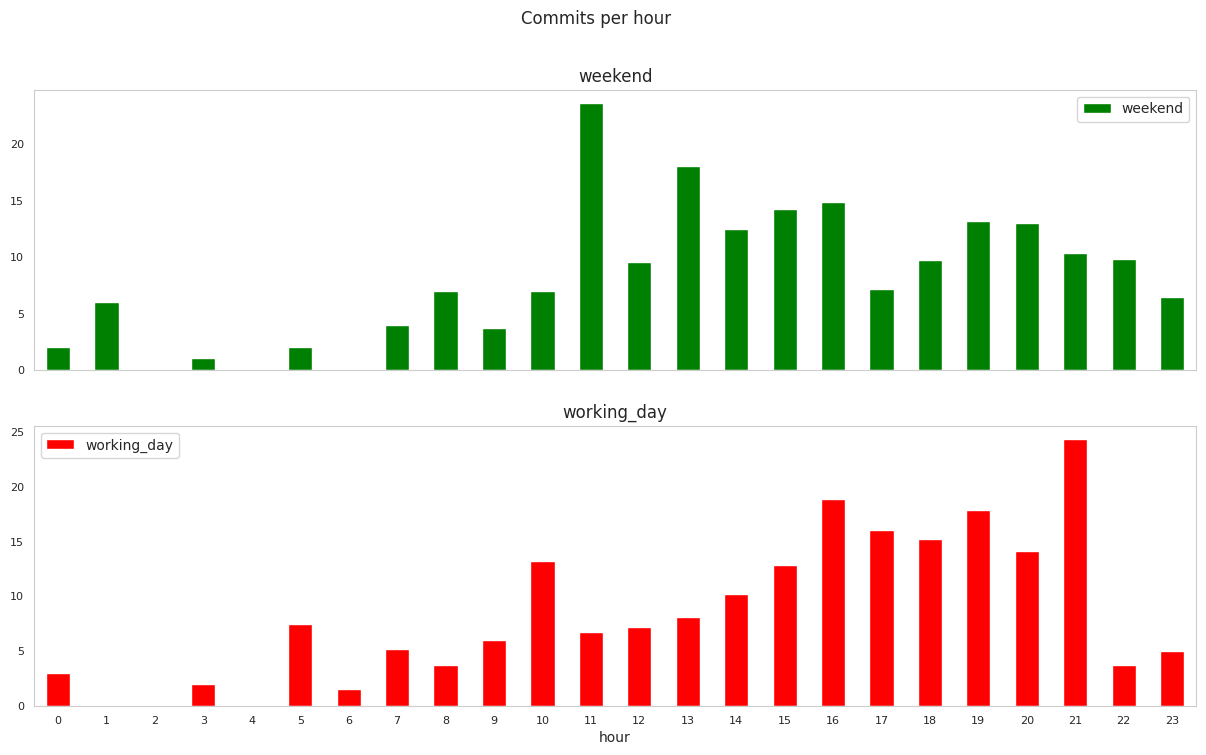

In [40]:
data.plot(kind='bar', subplots=True, sharex=True, rot=0, fontsize=8, figsize=(15,8), title='Commits per hour', color=['green', 'red'], grid=False)

## • at the end of your Jupyter Notebook, create a markdown cell and insert the question
◦ “Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

At working days — 21, at weekend — 11

In [41]:
con.close()